# Zillow Project - Predicting Property Tax Assessed Values

# Goal:

  Use the data from kaggle's chicago crime data set in order to predict specific crime counts for next year.

In [1]:
import model as m
import wrangle as w
import pandas as pd
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sqlalchemy import text, create_engine
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt 
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display, HTML

# Acquire
    -Data acquired Kaggle's Chicago Crime dataset
    -It contained '7842388' rows and '10' columns before cleaning
    -Each row represents a case number
    -Each column represents a feature of that case number
    

#  Prepare

### Prepare Actions:
```
- Checked for nulls in the data 
- Checked that column data types were appropriate
- Split data into train, validate and test 
- created function to acquire and prep data
- function created to split data into train, validate and test
- resample data by day
- unstacked 'Primary Type'
- kept 10 primary type values

```

## Data Dictionary  


#### Data Used
---
| Attribute | Definition | Data Type |
| ----- | ----- | ----- |
|Date| Dates in order by day |int|
|THEFT| Amount of thefts that has occured in a particular day |int|
|BATTERY|Amount of battery that havs occured in a particular day |int|
|ASSAULT| Amount of assault that has occured in a particular day |int|
|CRIMINAL DAMAGE| Amount of criminal damage that has occured in a particular day |int|
|MOTOR VEHICLE THEFT| Amount of motor vehicle theft that has occured in a particular day |int|
|NARCOTICS|Amount of narcotic related crimes that have occured in a particular day |int|
|HOMICIDE| Amount of homicides that have occured in a particular day|int|
|HUMAN TRAFFICKING| Amount of human trafficking that has occured in a particular day |int|
|OFFENSE INVOLVING CHILDREN| Amount of offenses involving children that have occured in a particular day|int|
|KIDNAPPING| Amount of kidnapping that has occured in a particular day |int|

## Quick Data Preview

In [2]:
# split data into train, validate and test
train, validate, test = w.wrangle_crime()

In [3]:
# this previews the training data
train.head()

Primary Type,THEFT,BATTERY,ASSAULT,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,NARCOTICS,HOMICIDE,HUMAN TRAFFICKING,OFFENSE INVOLVING CHILDREN,KIDNAPPING
Date,,,,,,,,,,
2018-08-03,102,68,22,28,15,15,1,0,5,1
2018-08-04,241,201,62,87,34,34,4,0,4,0
2018-08-05,223,199,77,97,20,18,8,0,4,2
2018-08-06,215,130,52,74,26,35,3,0,7,0
2018-08-07,232,122,46,69,36,32,2,0,5,0


## Data Summary

In [4]:
# provides a quick description of the data
train.describe()

Primary Type,THEFT,BATTERY,ASSAULT,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,NARCOTICS,HOMICIDE,HUMAN TRAFFICKING,OFFENSE INVOLVING CHILDREN,KIDNAPPING
count,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000
mean,136.905643,122.370028,53.307123,70.010176,25.979648,27.814061,1.834413,0.026827,5.605920,0.372803
std,43.126090,28.789819,10.972273,17.975366,6.551615,14.910835,1.680873,0.161652,3.383802,0.650328
min,37.000000,53.000000,22.000000,25.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,103.000000,46.000000,59.000000,22.000000,15.000000,1.000000,0.000000,3.000000,0.000000
50%,134.000000,120.000000,53.000000,69.000000,26.000000,28.000000,1.000000,0.000000,5.000000,0.000000
75%,173.000000,138.000000,61.000000,80.000000,30.000000,40.000000,3.000000,0.000000,7.000000,1.000000
max,272.000000,235.000000,89.000000,341.000000,93.000000,81.000000,19.000000,1.000000,46.000000,5.000000


# Explore

## Which crimes show a correlation with time?

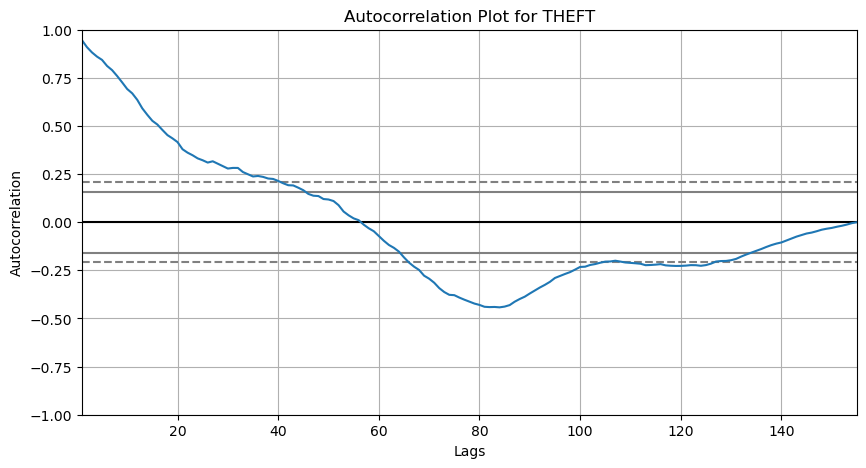

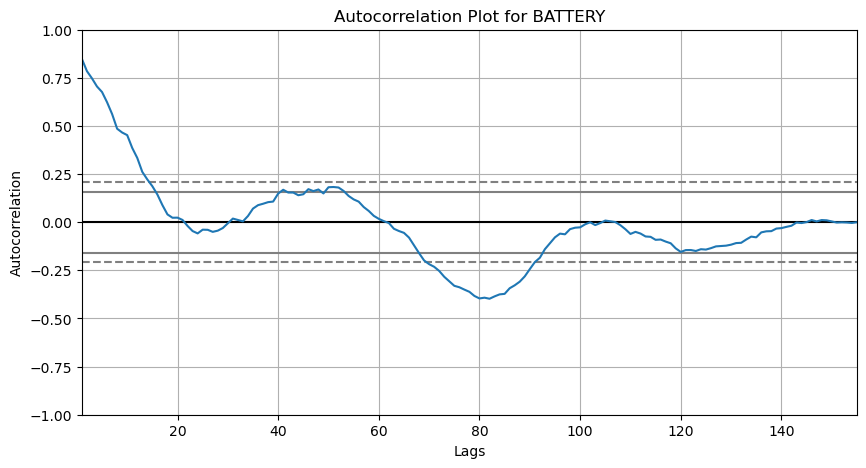

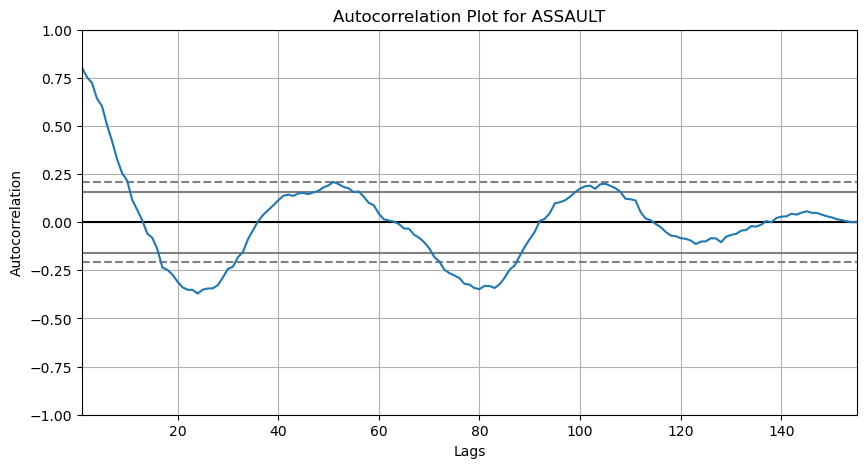

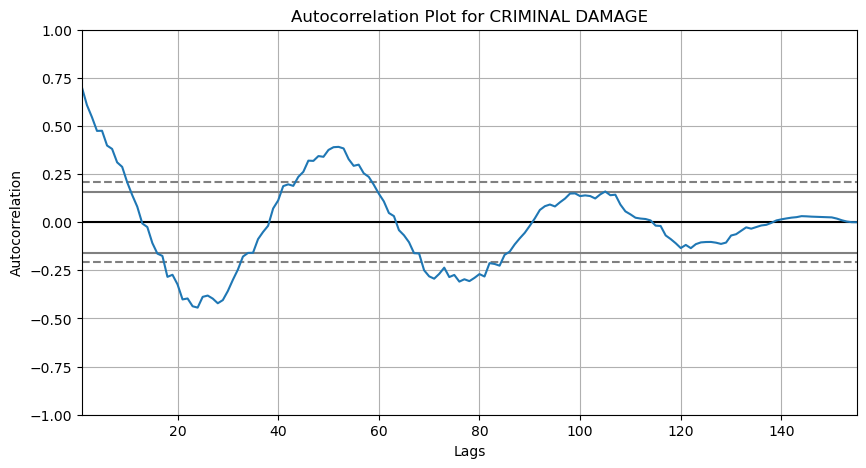

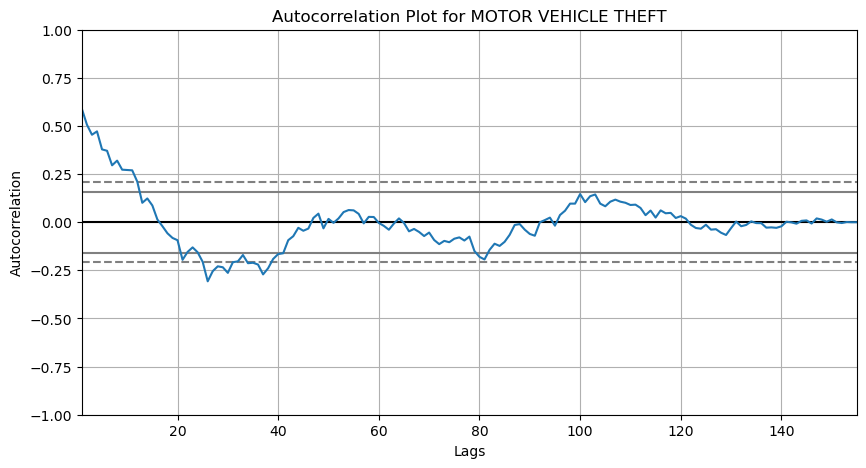

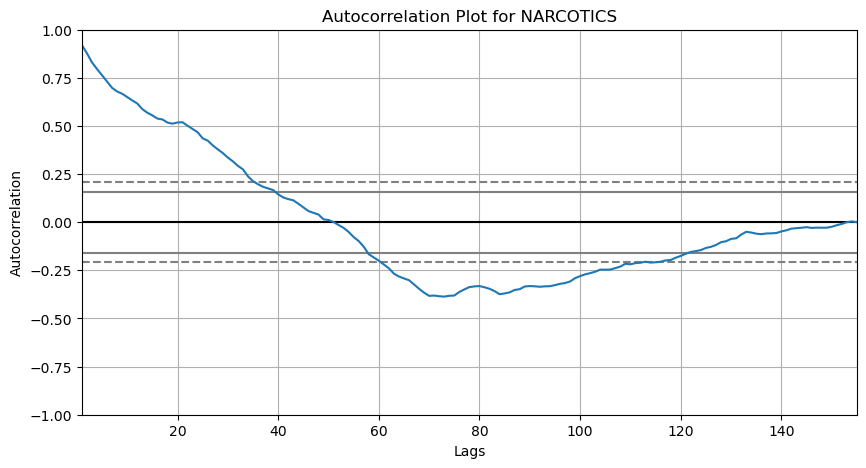

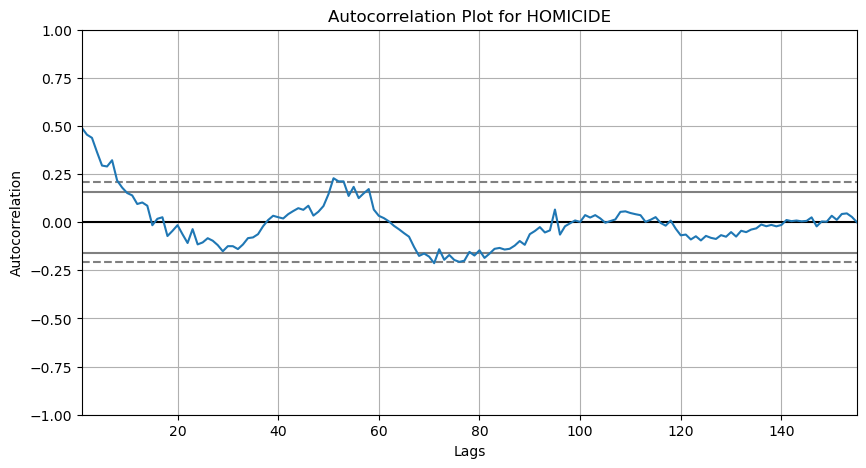

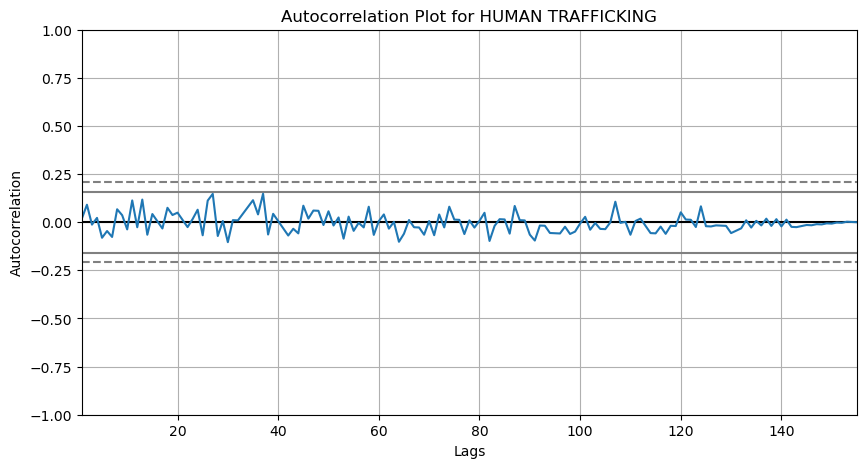

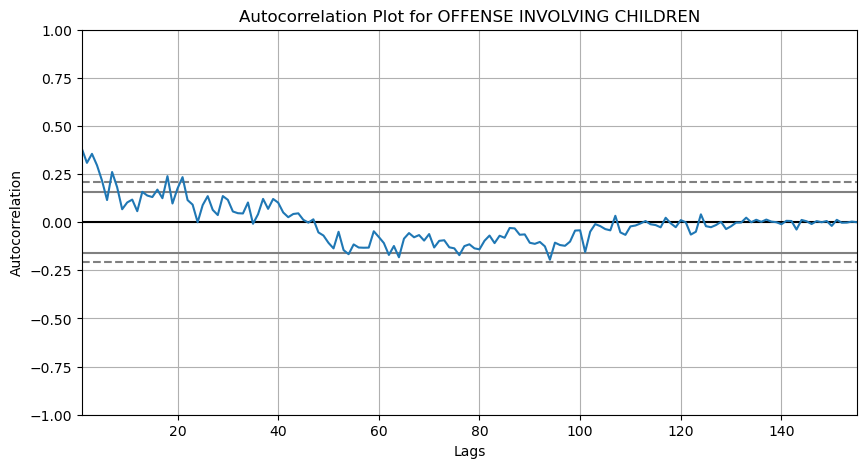

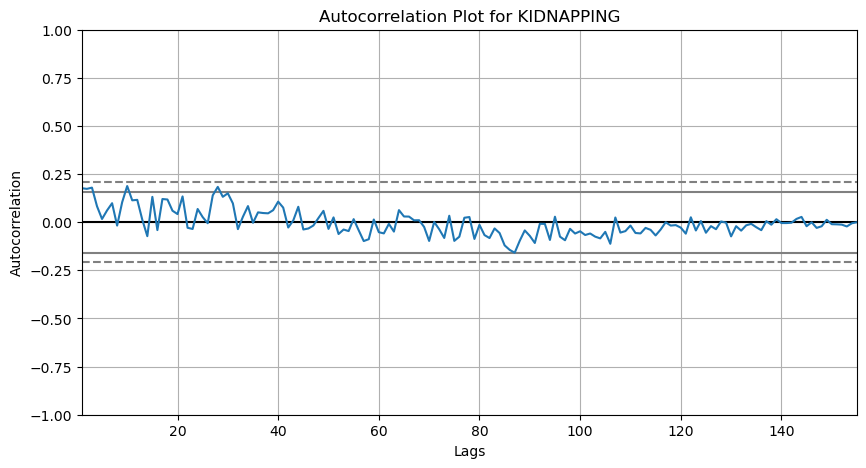

In [5]:
crime_types = train.columns

# Call the function with the train DataFrame and the crime types list
m.plot_autocorrelation(train, crime_types)

 - Visually no apparent correlation except a weak correlation with the following crimes: Assault, battery and criminal damages
 

## Exploration Summary
Assault, battery and criminal damages all seem to have some kind of correlation with time

- Revisisting data for more exploration may be necessary for predictability


## Features being turned into targets for Modeling by creating their own DataFrame's with Lag:

- ASSAULT - (relationship to time is weak but present)

- BATTERY - (relationship to time is weak but present)

- CRIMINAL DAMAGE -  (relationship to time is weak but present)





## Features not moving forward for modeling

```
'THEFT'
'MOTOR VEHICLE THEFT'
'NARCOTICS'
'HOMICIDE'
'HUMAN TRAFFICKING'
'OFFENSE INVOLVING CHILDREN'
'KIDNAPPING'
```
    

## Modeling

- I will use 3 Baseline models to find best baseline RMSE and 2 non-baseline models to find best RMSE

- Best Baseline to use for modeling was Moving Average (30 day window) 
- I will be evaluating models developed using 5 different model types.
- Models will be evaluated on train and validate data 
- The model that performs the best will then be evaluated on test data
- Data will be passed through as lag columns of the target variable

In [6]:
train = m.create_lagged_features(train, crime_types, max_lag=365)

In [7]:
train = train.dropna()

In [22]:
train.head()

Primary Type,THEFT,BATTERY,ASSAULT,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,NARCOTICS,HOMICIDE,HUMAN TRAFFICKING,OFFENSE INVOLVING CHILDREN,KIDNAPPING,...,CRIMINAL_DAMAGE_Lag_356,CRIMINAL_DAMAGE_Lag_357,CRIMINAL_DAMAGE_Lag_358,CRIMINAL_DAMAGE_Lag_359,CRIMINAL_DAMAGE_Lag_360,CRIMINAL_DAMAGE_Lag_361,CRIMINAL_DAMAGE_Lag_362,CRIMINAL_DAMAGE_Lag_363,CRIMINAL_DAMAGE_Lag_364,CRIMINAL_DAMAGE_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-03,227,185,62,80,30,50,3,0,8,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-04,224,199,59,89,34,42,2,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-05,186,151,66,100,29,43,2,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-06,177,142,62,87,25,49,0,1,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07,182,129,50,90,35,68,2,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
battery_train = ['BATTERY'] + [f'BATTERY_Lag_{lag}' for lag in range(1, 366)]

battery_train_df = train[battery_train].copy()

## BATTERY DF

In [14]:
battery_train_df.head(3)

Primary Type,BATTERY,BATTERY_Lag_1,BATTERY_Lag_2,BATTERY_Lag_3,BATTERY_Lag_4,BATTERY_Lag_5,BATTERY_Lag_6,BATTERY_Lag_7,BATTERY_Lag_8,BATTERY_Lag_9,...,BATTERY_Lag_356,BATTERY_Lag_357,BATTERY_Lag_358,BATTERY_Lag_359,BATTERY_Lag_360,BATTERY_Lag_361,BATTERY_Lag_362,BATTERY_Lag_363,BATTERY_Lag_364,BATTERY_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-03,185,141.0,127.0,123.0,130.0,161.0,198.0,185.0,136.0,133.0,...,196.0,178.0,137.0,147.0,125.0,122.0,130.0,199.0,201.0,68.0
2019-08-04,199,185.0,141.0,127.0,123.0,130.0,161.0,198.0,185.0,136.0,...,150.0,196.0,178.0,137.0,147.0,125.0,122.0,130.0,199.0,201.0
2019-08-05,151,199.0,185.0,141.0,127.0,123.0,130.0,161.0,198.0,185.0,...,142.0,150.0,196.0,178.0,137.0,147.0,125.0,122.0,130.0,199.0


In [24]:
criminal_damage_train = ['CRIMINAL DAMAGE'] + [f'CRIMINAL_DAMAGE_Lag_{lag}' for lag in range(1, 366)]

criminal_damage_train_df = train[criminal_damage_train].copy()

## CRIMINAL DAMAGE DF

In [26]:
criminal_damage_train_df.head(3)

Primary Type,CRIMINAL DAMAGE,CRIMINAL_DAMAGE_Lag_1,CRIMINAL_DAMAGE_Lag_2,CRIMINAL_DAMAGE_Lag_3,CRIMINAL_DAMAGE_Lag_4,CRIMINAL_DAMAGE_Lag_5,CRIMINAL_DAMAGE_Lag_6,CRIMINAL_DAMAGE_Lag_7,CRIMINAL_DAMAGE_Lag_8,CRIMINAL_DAMAGE_Lag_9,...,CRIMINAL_DAMAGE_Lag_356,CRIMINAL_DAMAGE_Lag_357,CRIMINAL_DAMAGE_Lag_358,CRIMINAL_DAMAGE_Lag_359,CRIMINAL_DAMAGE_Lag_360,CRIMINAL_DAMAGE_Lag_361,CRIMINAL_DAMAGE_Lag_362,CRIMINAL_DAMAGE_Lag_363,CRIMINAL_DAMAGE_Lag_364,CRIMINAL_DAMAGE_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-03,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-04,89,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-05,100,89.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
assault_train = ['ASSAULT'] + [f'ASSAULT_Lag_{lag}' for lag in range(1, 366)]

assault_train_df = train[assault_train].copy()

## ASSAULT DF

In [16]:
assault_train_df.head(3)

Primary Type,ASSAULT,ASSAULT_Lag_1,ASSAULT_Lag_2,ASSAULT_Lag_3,ASSAULT_Lag_4,ASSAULT_Lag_5,ASSAULT_Lag_6,ASSAULT_Lag_7,ASSAULT_Lag_8,ASSAULT_Lag_9,...,ASSAULT_Lag_356,ASSAULT_Lag_357,ASSAULT_Lag_358,ASSAULT_Lag_359,ASSAULT_Lag_360,ASSAULT_Lag_361,ASSAULT_Lag_362,ASSAULT_Lag_363,ASSAULT_Lag_364,ASSAULT_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-03,62,57.0,59.0,48.0,60.0,62.0,56.0,56.0,67.0,56.0,...,67.0,66.0,66.0,49.0,63.0,46.0,52.0,77.0,62.0,22.0
2019-08-04,59,62.0,57.0,59.0,48.0,60.0,62.0,56.0,56.0,67.0,...,59.0,67.0,66.0,66.0,49.0,63.0,46.0,52.0,77.0,62.0
2019-08-05,66,59.0,62.0,57.0,59.0,48.0,60.0,62.0,56.0,56.0,...,67.0,59.0,67.0,66.0,66.0,49.0,63.0,46.0,52.0,77.0


### Models for Predicting Assault

In [ ]:
evaluation_results = m.evaluate_assault_model(assault_train_df)

### LinearRegression (OLS)

In [ ]:


# MAKE THE THING: create the model object
OLSmodel = LinearRegression()

#1. FIT THE THING: fit the model to training data

OLSmodel.fit(X_train, y_train.tax_value)
#2. USE THE THING: make a prediction
y_train['value_pred_ols'] = OLSmodel.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_ols) **.5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_ols'] = OLSmodel.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_ols) ** .5

rmse_train = round(rmse_train, 2)
rmse_validate = round(rmse_validate, 2)
difference = round(rmse_validate - rmse_train, 2)


model_rmse.append({
    'model': 'OLS',
'Training/In-Sample': rmse_train, 
'Validation/Out-of-Sample': rmse_validate,
'Difference':  rmse_validate - rmse_train,

})
pd.DataFrame(model_rmse)

### LassoLars

In [ ]:

# MAKE THE THING: create the model object
lars = LassoLars(alpha = 0.01)

#1. FIT THE THING: fit the model to training data

lars.fit(X_train, y_train.tax_value)
#2. USE THE THING: make a prediction
y_train['value_pred_lars'] = lars.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_lars) **.5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_lars'] = lars.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_lars) ** .5

rmse_train = round(rmse_train, 2)
rmse_validate = round(rmse_validate, 2)
difference = round(rmse_validate - rmse_train, 2)


model_rmse.append({
    'model': 'LassoLars',
'Training/In-Sample': rmse_train, 
'Validation/Out-of-Sample': rmse_validate,
'Difference':  rmse_validate - rmse_train,

})
pd.DataFrame(model_rmse)

### TweedieRegressor (GLM:Generalized Linear Model)

In [ ]:


# MAKE THE THING: create the model object
glm = TweedieRegressor(power = 2, alpha = 0.2)

glm.fit(X_train, y_train.tax_value)
#2. USE THE THING: make a prediction
y_train['value_pred_glm'] = glm.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_glm) **.5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_glm'] = glm.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_glm) ** .5


rmse_train = round(rmse_train, 2)
rmse_validate = round(rmse_validate, 2)
difference = round(rmse_validate - rmse_train, 2)


model_rmse.append({
'model': 'GLM',
'Training/In-Sample': rmse_train, 
'Validation/Out-of-Sample': rmse_validate,
'Difference':  rmse_validate - rmse_train,

})
pd.DataFrame(model_rmse)

### Ploynomial Regression

In [ ]:
 

# Create polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)

# Fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train.tax_value)

# Make predictions on training set
y_train['value_pred_poly'] = poly_reg.predict(X_train_poly)
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_poly) ** 0.5

# Make predictions on validation set
y_validate['value_pred_poly'] = poly_reg.predict(X_validate_poly)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_poly) ** 0.5

rmse_train = round(rmse_train, 2)
rmse_validate = round(rmse_validate, 2)
difference = round(rmse_validate - rmse_train, 2)


model_rmse.append({
    'model': 'Poly',
'Training/In-Sample': rmse_train, 
'Validation/Out-of-Sample': rmse_validate,
'Difference':  rmse_validate - rmse_train,

})
pd.DataFrame(model_rmse)

# Comparing Models

- All models outperformed baseline
- LassoLars and Linear Regression models had a slightly lower error reduction at 15% better than baseline.
- The TweedieRegressor model barely outperformed baseline by 6%.
- Considering all models, as they did all beat baseline, Polynomial Regression model outperformed baseline by 17% which was the highest in error reduction.
- I will be using my polynomial regression model to run on test as it performed the best for seen and unseen data with the lowest RMSE

In [ ]:
#code runs test on polynomial regression
X_test_poly = poly.transform(X_test)

y_test_pred = poly_reg.predict(X_test_poly)

rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5

print(f"RMSE on Test Set: {rmse_test}")

### Modeling Summary
- All models performed better than baseline
- RMSE on POLY Test Set beats baselines RMSE train and RMSE validate by approximately 76,000  dollars less in error which equates to 18% error reduction from baseline
- Polynomial was selected as the final model and had a test RMSE of 358,000 dollars

## Conclusions

### Exploration

- bathroom count and square footage had the strongest correlation with the target
- county code, bedroom count, year built had a very weak correlation with the target
- county code had the weakest relation to the home's value
- square footage had the strongest correlation to home's value

## Modeling

#### The final model succeeded in outperforming the baseline RMSE by 18%. 



## Recommendations

#### Utilize the Polynomial model made in order to reduce error in predicting the home's value by about 76,000 dollars

## Next Steps

- Further explore columns in the data set to further reduce error
- Look for more features that may have a stronger correlation than current features given to the model
- To find a prediction with less error it may be a good idea to find the property tax in 2017 for the cities where the home is located and create a feature that approximates the homes property tax using the target feature data and the tax rate for that area.